In [1]:
def cluster_visual(atac2,csv_name):
    import scanpy as sc
    atac2.obsm['proj']=pd.read_csv(csv_name,index_col=0).values
    sc.pp.neighbors(atac2,use_rep = 'proj',metric='cosine')
    sc.tl.umap(atac2)
    sc.tl.leiden(atac2)
    sc.pl.umap(atac2,color=['leiden','cell_type'])
   


2024-02-01 19:36:47.333270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 19:36:48.208868: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 19:36:48.519198: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 19:36:49.681109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

2024-01-31-22_55_35output/output0


2024-02-01 19:36:51.275733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 19:36:51.398176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 19:36:51.398298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 19:36:51.400727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

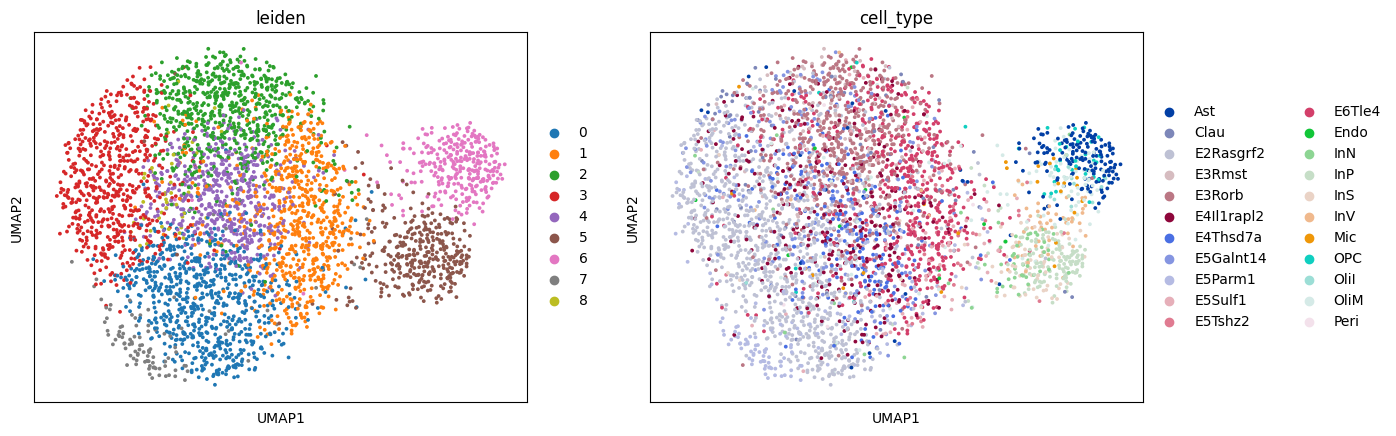

2024-01-31-22_55_35output/output1


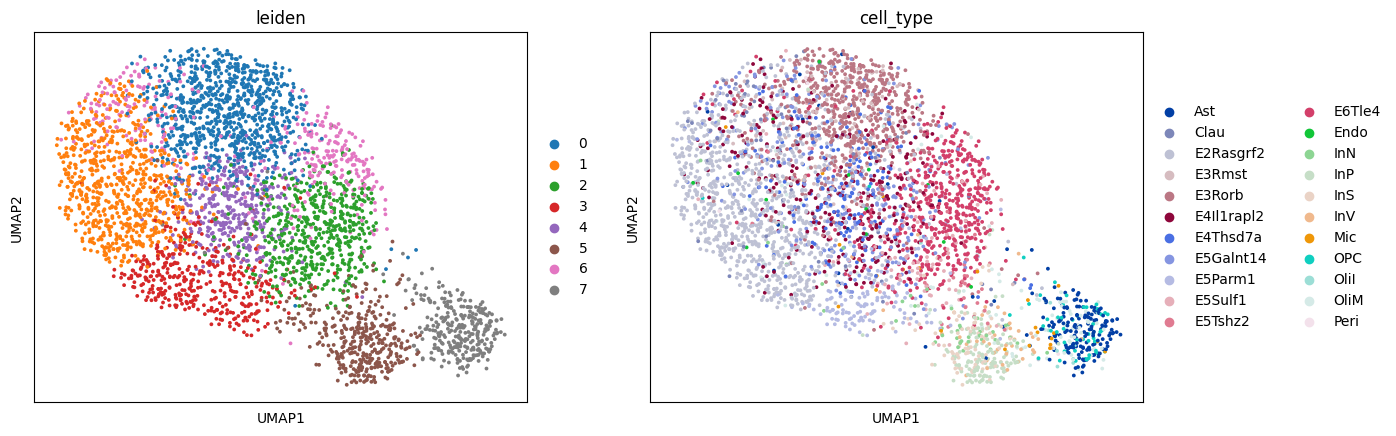

2024-01-31-22_55_35output/output2


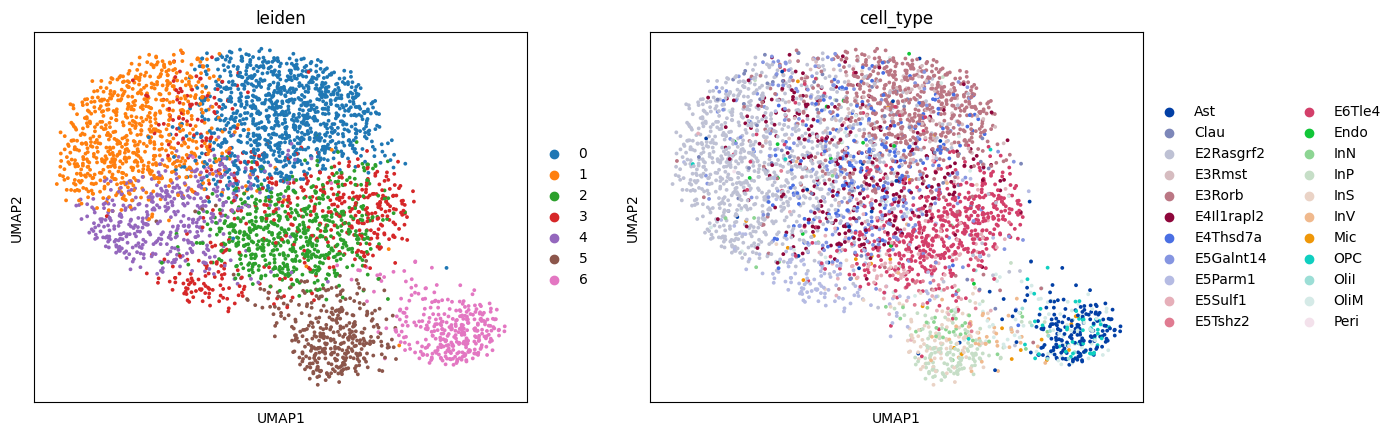

In [2]:
path='2024-01-31-22_55_35'
data=path+'data/atac'
output=path+'output'
import os 
os.makedirs(path+'scb_embedding',exist_ok=True)
from helper import save_scb_embedding
import sys
import anndata as ad 
sys.path[0]='/home/ubuntu0/scBasset'
from scbasset.utils import make_model,get_cell_embedding
import pandas as pd   
for i in range(3):
    atac_pth=data+str(i)+'.h5ad'
    weight_pth=os.path.join(output,'output'+str(i))
    weight=os.path.join(weight_pth,'best_model.h5')
    print(weight_pth)
    csv_pth=path+'scb_embedding/scb'+str(i)+'.csv'
    atac=ad.read_h5ad(atac_pth)
    model = make_model(100,atac.shape[0],show_summary=False)
    model.load_weights('/home/ubuntu0/scBasset/training_pipeline/2024-01-31-22_55_35output/output'+str(i)+'/best_model.h5')
    proj=get_cell_embedding(model)
    pd.DataFrame(proj).to_csv(csv_pth)
    cluster_visual(atac,csv_pth)
    
    